# **Logistic Regression**

### S-Curves | Sigmoid Function | Logit Function | Log Odds

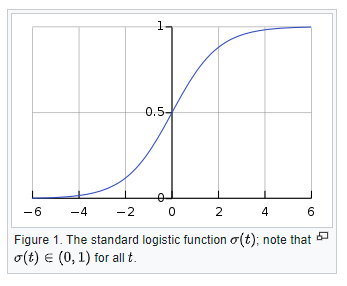

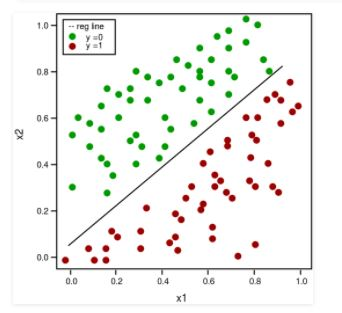

In [1]:
from IPython.display import Image
Image(filename='Log_Reg.JPG') 

# **Importing the required libraries**

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# **Loading the dataset**

In [3]:
# Importing the dataset
df = pd.read_csv('iris.csv')

# **EDA**

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df['species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [6]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [7]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [8]:
df['species'].nunique()

3

In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# **Splitting the dataset into the Training set and Test set**

In [10]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, [0,1,2,3]].values
y = df.iloc[:, 4].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# **Fitting Logistic Regression to the Training set**

In [12]:
classifier = LogisticRegression(multi_class='auto')
classifier.fit(X_train, y_train)

LogisticRegression()

# **Predicting the Test set results**

In [13]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [14]:
# Accuracy score
accuracy_score(y_test, y_pred)

1.0

In [15]:
# Predict probabilities
probs_y=classifier.predict_proba(X_test)
probs_y = np.round(probs_y, 2)

In [16]:
res = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("y_test", "y_pred", "Setosa(%)", "versicolor(%)", "virginica(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) for x, y, a, b, c in zip(y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
res += "\n"+"-"*65+"\n"
print(res)

y_test     | y_pred     | Setosa(%)  | versicolor(%) | virginica(%)
-----------------------------------------------------------------
versicolor | versicolor | 0.0        | 0.82          | 0.17      
setosa     | setosa     | 0.94       | 0.06          | 0.0       
virginica  | virginica  | 0.0        | 0.0           | 1.0       
versicolor | versicolor | 0.01       | 0.79          | 0.21      
versicolor | versicolor | 0.0        | 0.77          | 0.23      
setosa     | setosa     | 0.95       | 0.05          | 0.0       
versicolor | versicolor | 0.08       | 0.91          | 0.02      
virginica  | virginica  | 0.0        | 0.16          | 0.84      
versicolor | versicolor | 0.0        | 0.78          | 0.22      
versicolor | versicolor | 0.03       | 0.94          | 0.03      
virginica  | virginica  | 0.0        | 0.24          | 0.76      
setosa     | setosa     | 0.97       | 0.03          | 0.0       
setosa     | setosa     | 0.97       | 0.03          | 0.0       
setosa  